In [ ]:
# Step 1: Reading the data
from google.colab import files
uploaded = files.upload()

Saving RCA_V3.csv to RCA_V3.csv


In [ ]:
pip install pandas scikit-learn seaborn shap tensorflow matplotlib


In [ ]:
pip install pandas sklearn shap tensorflow matplotlib


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
pip install --index-url https://pypi.org/simple pandas scikit-learn shap tensorflow matplotlib


In [ ]:
!pip install shap

                                                    text        label
0      Parking position handling was not well address...       Design
1                       The SDS of WH was not up-to-date       Design
2                 Direct use of a trace definition file.  Integration
3                 Patch too old, not traceable any more.  Integration
4      Clearmake does not remove already build obsole...  Integration
...                                                  ...          ...
10735                                         SW design.       Design
10736                                         SW design.       Design
10737  A DDF timeout is not reported by the CN facili...  Realization
10738  Automated regression does not capture the impa...       Design
10739  The combination of file sizes, number of scann...        Other

[10521 rows x 2 columns]
Missing values:
 text     316
label    264
dtype: int64
Data shape: (10521, 2)


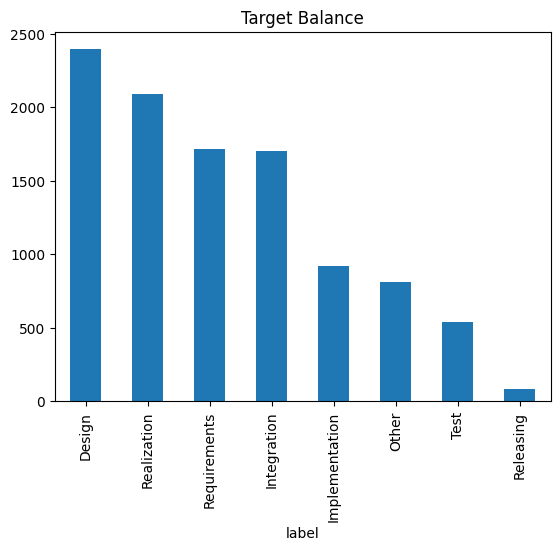

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 104s 543ms/step - accuracy: 0.2107 - loss: 1.9957 - val_accuracy: 0.3816 - val_loss: 1.7578
Epoch 2/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 83s 469ms/step - accuracy: 0.4512 - loss: 1.5947 - val_accuracy: 0.5021 - val_loss: 1.4826
Epoch 3/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 77s 436ms/step - accuracy: 0.6398 - loss: 1.0858 - val_accuracy: 0.5326 - val_loss: 1.4490
Epoch 4/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 89s 477ms/step - accuracy: 0.7671 - loss: 0.7382 - val_accuracy: 0.5489 - val_loss: 1.5038
Epoch 5/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 76s 431ms/step - accuracy: 0.8386 - loss: 0.5019 - val_accuracy: 0.5695 - val_loss: 1.5350
109/109 ━━━━━━━━━━━━━━━━━━━━ 13s 123ms/step - accuracy: 0.5326 - loss: 1.6498
Test Accuracy: 53.83%


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.feature_extraction.text import CountVectorizer


# Step 2: Drop unnecessary columns and rename cols,
# Assuming we need only 'text' and 'label' columns
data = (pd.read_csv('RCA_V3.csv',sep=None,engine='python', usecols = ['RCA_Main_Root_Cause','RCA Defect Domain'])).dropna(how='all')
data.columns = ['text', 'label']
data.head()
print(data)

# Step 3: Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Step 4: Check data shape
print("Data shape:", data.shape)

# Step 5: Check target balance
data['label'].value_counts().plot(kind='bar')
plt.title('Target Balance')
plt.show()

# Step 6: Fill NaN in 'text' column with an empty string
data = data.assign(text=data['text'].fillna(''))

# Step 7: Create Feature and Label sets
X = data['text']
y = data['label']

# Step 8: Assuming 'text' column may have NaN values, fill NaN with an empty string (Redundant)
X.fillna('', inplace=True)

# Step 9: Encode labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 10: Train-test split (67% train - 33% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.33, random_state=42)

# Step 11: Train Bag of Words model
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Step 12: Reverse the encoding to get original class labels
original_labels = label_encoder.inverse_transform(y_encoded)

# Step 13: Tokenization and padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
max_len = max(len(seq) for seq in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Step 14: Convert labels to one-hot encoding using numpy
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

# Step 15: Define RNN
vocab_size = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

# Train the model
history = model.fit(X_train_pad, y_train_oh, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test_oh)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
221/221 ━━━━━━━━━━━━━━━━━━━━ 114s 481ms/step - accuracy: 0.2216 - loss: 2.0033 - val_accuracy: 0.3482 - val_loss: 1.7694
Epoch 2/5
221/221 ━━━━━━━━━━━━━━━━━━━━ 104s 471ms/step - accuracy: 0.4564 - loss: 1.5720 - val_accuracy: 0.4672 - val_loss: 1.5561
Epoch 3/5
221/221 ━━━━━━━━━━━━━━━━━━━━ 144s 481ms/step - accuracy: 0.6284 - loss: 1.1213 - val_accuracy: 0.4960 - val_loss: 1.5866
Epoch 4/5
221/221 ━━━━━━━━━━━━━━━━━━━━ 115s 521ms/step - accuracy: 0.7226 - loss: 0.8607 - val_accuracy: 0.5086 - val_loss: 1.6587
Epoch 5/5
221/221 ━━━━━━━━━━━━━━━━━━━━ 132s 474ms/step - accuracy: 0.7818 - loss: 0.6886 - val_accuracy: 0.5268 - val_loss: 1.6737


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 339ms/step


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 106ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.072e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.533e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 9 iterations, i.e. alpha=9.287e-03, with an active set of 7 regressors, and the smallest cholesky pivot element being 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 104ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.326e-01, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:755: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 92 iterations, alpha=3.012e-03, previous alpha=3.012e-03, with an active set of 37 regressors.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.719e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter 

Shape of SHAP values:  (199, 9)
Shape of X_test_pad:  (10, 199)
Length of feature names:  199
First instance SHAP values:  [ 0.          0.          0.          0.          0.          0.
 -0.01922302  0.          0.        ]
First instance features:  [  81  557    5 6930    2   49    5  759    2   82    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0   

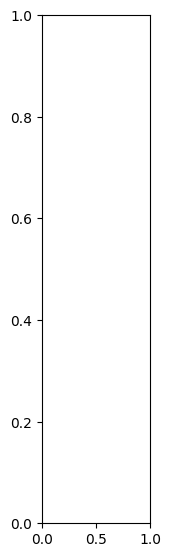

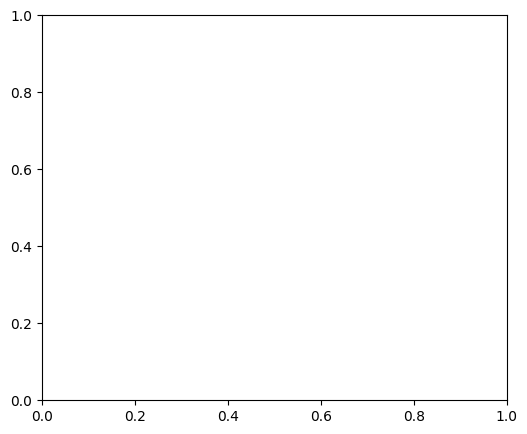

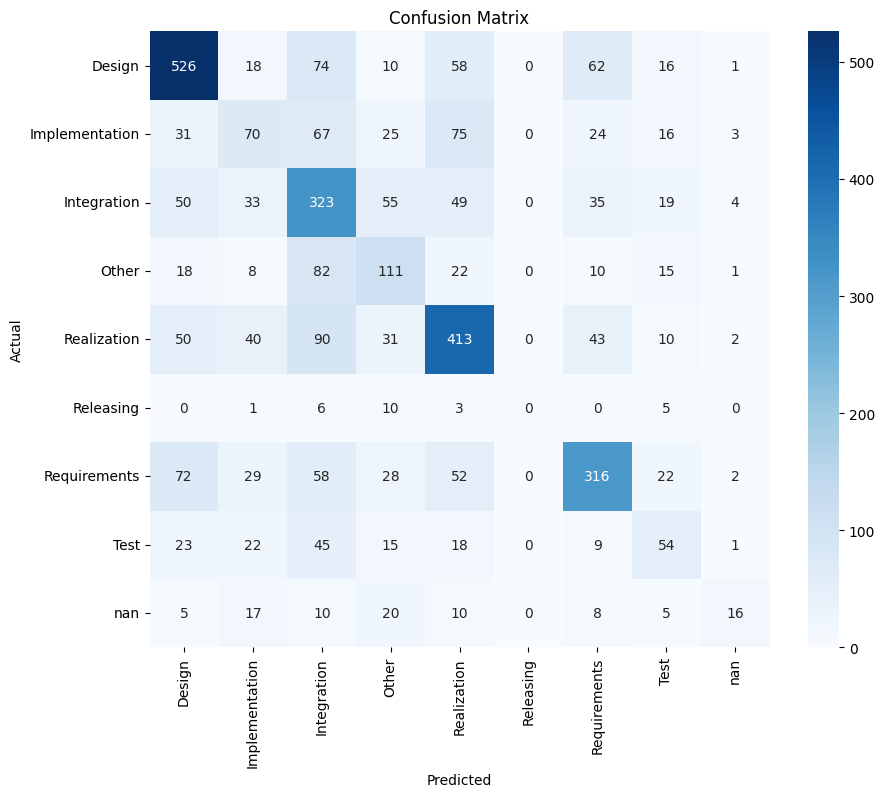

Classification Report
                precision    recall  f1-score   support

        Design       0.68      0.69      0.68       765
Implementation       0.29      0.23      0.26       311
   Integration       0.43      0.57      0.49       568
         Other       0.36      0.42      0.39       267
   Realization       0.59      0.61      0.60       679
     Releasing       0.00      0.00      0.00        25
  Requirements       0.62      0.55      0.58       579
          Test       0.33      0.29      0.31       187
           nan       0.53      0.18      0.26        91

      accuracy                           0.53      3472
     macro avg       0.43      0.39      0.40      3472
  weighted avg       0.53      0.53      0.52      3472



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
import shap
import tensorflow as tf


# Tokenize the text data
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input size
max_length = max(max(len(seq) for seq in X_train_seq), max(len(seq) for seq in X_test_seq))  # Adjust to ensure it covers the number of features
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Convert labels to one-hot encoding
num_classes = len(label_encoder.classes_)
y_train_oh = pd.get_dummies(y_train).values
y_test_oh = pd.get_dummies(y_test).values

# Build the RNN model
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')  # Use softmax for multi-class classification
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the RNN model
history = model.fit(X_train_pad, y_train_oh, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test_oh))

# Initialize the JS visualization code for SHAP
shap.initjs()

# Use KernelExplainer to explain predictions
background = X_train_pad[:100]  # Using a subset of training data for background

# Define a prediction function
def predict_fn(data):
    return model.predict(data)

explainer = shap.KernelExplainer(predict_fn, background)
shap_values = explainer.shap_values(X_test_pad[:10], nsamples=100)  # Explain predictions for a subset of test data

# Ensure feature names match the padded sequence length
feature_names = [tokenizer.index_word.get(i, 'UNK') for i in range(1, max_length + 1)]

# Verify dimensions
print("Shape of SHAP values: ", shap_values[0].shape)
print("Shape of X_test_pad: ", X_test_pad[:10].shape)
print("Length of feature names: ", len(feature_names))

# Print first instance of SHAP values and features to debug
print("First instance SHAP values: ", shap_values[0][0])
print("First instance features: ", X_test_pad[0])

# Ensure SHAP values are correctly formatted
shap_values = shap_values[0] if isinstance(shap_values, list) else shap_values

# Plot the SHAP values for the first instance
try:
    shap.force_plot(explainer.expected_value[0], shap_values[0], X_test_pad[0], feature_names=feature_names)
except Exception as e:
    print(f"Error plotting SHAP force plot: {e}")

# Summary plot for a larger overview of the feature importances
try:
    shap.summary_plot(shap_values, X_test_pad[:10], feature_names=feature_names)
except Exception as e:
    print(f"Error plotting SHAP summary plot: {e}")

# Dependence plot for a specific feature
chosen_feature_index = 0  # Index of the feature you are interested in
try:
    shap.dependence_plot(chosen_feature_index, shap_values, X_test_pad[:10], feature_names=feature_names)
except Exception as e:
    print(f"Error plotting SHAP dependence plot: {e}")

# Ensure all label_encoder.classes_ are strings for classification_report
label_classes = list(map(str, label_encoder.classes_))

# Evaluate the model
y_pred = []
for i in range(len(X_test_pad)):
    X = np.expand_dims(X_test_pad[i], axis=0)
    pred = model.predict_on_batch(X)
    y_pred.append(np.argmax(pred))

y_true = np.argmax(y_test_oh, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
df_conf_matrix = pd.DataFrame(cm, index=label_encoder.classes_, columns=label_encoder.classes_)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=label_classes))

In [ ]:
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
import shap
import tensorflow as tf

# Initialize the JS visualization code for SHAP
shap.initjs()

# Use KernelExplainer to explain predictions
background = X_train_pad[:100]  # Using a subset of training data for background

# Define a prediction function
def predict_fn(data):
    return model.predict(data)

explainer = shap.KernelExplainer(predict_fn, background)
shap_values = explainer.shap_values(X_test_pad[:10], nsamples=100)  # Explain predictions for a subset of test data

# Ensure feature names match the padded sequence length
feature_names = [tokenizer.index_word.get(i, 'UNK') for i in range(1, max_length + 1)]

# Verify dimensions
print("Shape of SHAP values: ", shap_values[0].shape)
print("Shape of X_test_pad: ", X_test_pad[:10].shape)
print("Length of feature names: ", len(feature_names))

# Plot the SHAP values for the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test_pad[0], feature_names=feature_names)

# Summary plot for a larger overview of the feature importances
shap.summary_plot(shap_values[0], X_test_pad[:10], feature_names=feature_names)

# Dependence plot for a specific feature
chosen_feature_index = 0  # Index of the feature you are interested in
shap.dependence_plot(chosen_feature_index, shap_values[0], X_test_pad[:10], feature_names=feature_names)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 107ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 13 iterations, i.e. alpha=4.618e-03, with an active set of 13 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 17 iterations, i.e. alpha=3.199e-03, with an active set of 15 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 33 iterations, i.e. alpha=9.230e-04, with an active set of 25 regressors, and the smallest cholesky pivot element b

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 106ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 15 iterations, i.e. alpha=1.066e-03, with an active set of 13 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:755: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 27 iterations, alpha=5.257e-04, previous alpha=5.257e-04, with an active set of 22 regressors.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.466e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_ite

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 86 iterations, i.e. alpha=9.600e-07, with an active set of 48 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:755: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 87 iterations, alpha=9.600e-07, previous alpha=9.443e-07, with an active set of 48 regressors.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 104ms/step
Shape of SHAP values:  (199, 9)
Shape of X_test_pad:  (10, 199)
Length of feature names:  199


DimensionError: Length of features is not equal to the length of shap_values!

In [ ]:
#one-hot encoding printing
print(y_train_oh )
print(y_test_oh  )

[[False False False ...  True False False]
 [False False  True ... False False False]
 [ True False False ... False False False]
 ...
 [False False False ... False False False]
 [False False  True ... False False False]
 [False False False ... False False False]]
[[False False  True ... False False False]
 [False False False ... False False False]
 [False False False ... False False  True]
 ...
 [False False  True ... False False False]
 [False False False ... False False False]
 [ True False False ... False False False]]


In [ ]:
import numpy as np
import tensorflow as tf
import keras
from keras import layers

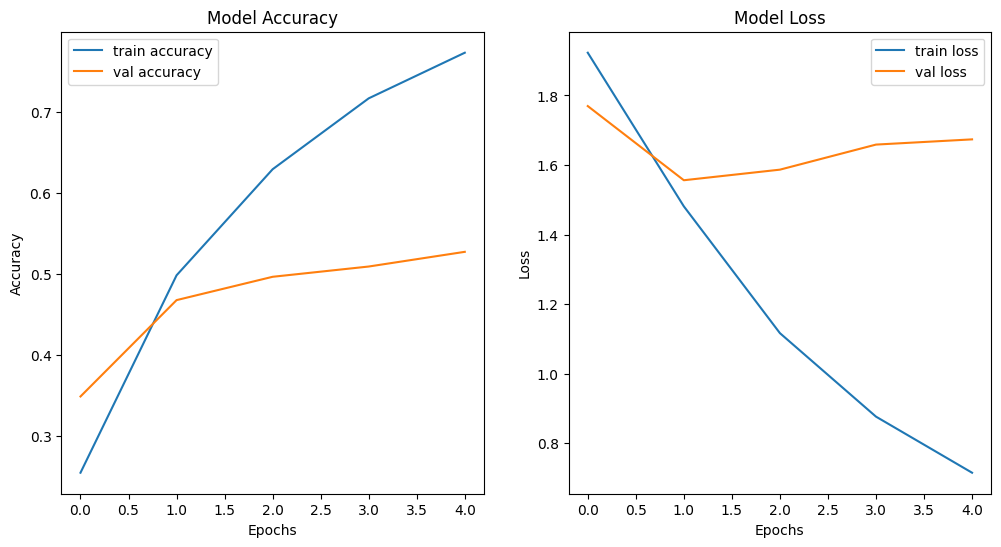

In [ ]:

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()





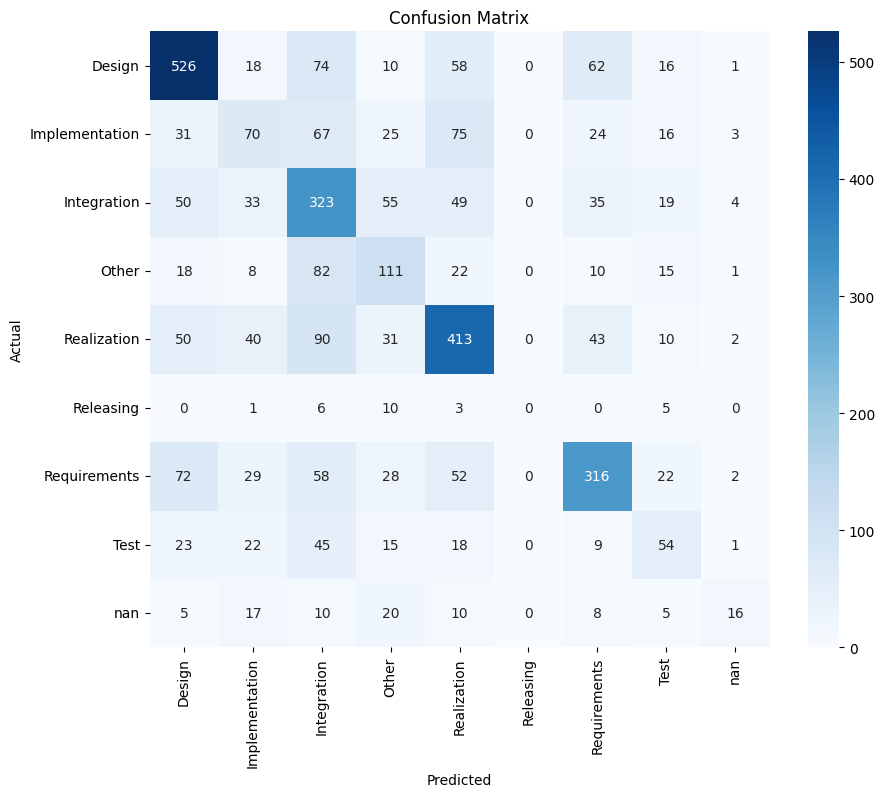

Classification Report
                precision    recall  f1-score   support

        Design       0.68      0.69      0.68       765
Implementation       0.29      0.23      0.26       311
   Integration       0.43      0.57      0.49       568
         Other       0.36      0.42      0.39       267
   Realization       0.59      0.61      0.60       679
     Releasing       0.00      0.00      0.00        25
  Requirements       0.62      0.55      0.58       579
          Test       0.33      0.29      0.31       187
           nan       0.53      0.18      0.26        91

      accuracy                           0.53      3472
     macro avg       0.43      0.39      0.40      3472
  weighted avg       0.53      0.53      0.52      3472



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
y_pred = []
for i in range(len(X_test_pad)):
    X = np.expand_dims(X_test_pad[i], axis=0)
    y = np.expand_dims(y_test_oh[i], axis=0)
    pred = model.predict_on_batch(X)
    y_pred.append(np.argmax(pred))

y_true = np.argmax(y_test_oh, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_classes, yticklabels=label_classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=label_classes))

In [ ]:
#RNN State Reuse
paragraph1 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph2 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph3 = np.random.random((20, 10, 50)).astype(np.float32)

lstm_layer = layers.LSTM(64, stateful=True)
output = lstm_layer(paragraph1)
output = lstm_layer(paragraph2)

existing_state = lstm_layer.states

new_lstm_layer = layers.LSTM(64)
new_output = new_lstm_layer(paragraph3, initial_state=existing_state)
print(new_output)

tf.Tensor(
[[-0.03827906 -0.02058156  0.08140443 ...  0.06719646 -0.47441095
   0.09062587]
 [-0.05340661  0.11028744 -0.02655625 ...  0.02888385 -0.36917928
   0.00142491]
 [-0.08456764  0.05787565 -0.05752568 ...  0.00681148 -0.25683168
   0.01850679]
 ...
 [ 0.01549388  0.03168564 -0.04168218 ...  0.05897542 -0.25432348
  -0.01756937]
 [-0.02981446 -0.01225073  0.07367025 ...  0.09954083 -0.32918623
  -0.10020249]
 [ 0.0205793  -0.03098122  0.05009558 ...  0.01907585 -0.3025314
  -0.04134347]], shape=(20, 64), dtype=float32)


In [ ]:
#Bidirectional RNNs
model = keras.Sequential()

model.add(
    layers.Bidirectional(layers.LSTM(64, return_sequences=True), input_shape=(5, 10))
)
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(10))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional)      │ (None, 5, 128)              │          38,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,266 (313.54 KB)

 Trainable params: 80,266 (313.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
batch_size = 64
# Each MNIST image batch is a tensor of shape (batch_size, 28, 28).
# Each input sequence will be of size (28, 28) (height is treated like time).
input_dim = 28

units = 64
output_size = 10  # labels are from 0 to 9


# Build the RNN model
def build_model(allow_cudnn_kernel=True):
    # CuDNN is only available at the layer level, and not at the cell level.
    # This means `LSTM(units)` will use the CuDNN kernel,
    # while RNN(LSTMCell(units)) will run on non-CuDNN kernel.
    if allow_cudnn_kernel:
        # The LSTM layer with default options uses CuDNN.
        lstm_layer = keras.layers.LSTM(units, input_shape=(None, input_dim))
    else:
        # Wrapping a LSTMCell in a RNN layer will not use CuDNN.
        lstm_layer = keras.layers.RNN(
            keras.layers.LSTMCell(units), input_shape=(None, input_dim)
        )
    model = keras.models.Sequential(
        [
            lstm_layer,
            keras.layers.BatchNormalization(),
            keras.layers.Dense(output_size),
        ]
    )
    return model




In [ ]:
pip install --upgrade tensorflow keras


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1


In [ ]:
import tensorflow as tf
from tensorflow import keras

# Ensure x_train, y_train, x_test, y_test, and batch_size are defined before this point
# Example definitions (replace these with your actual data and batch size)
x_train, y_train = tf.random.normal((100, 28, 28)), tf.random.uniform((100,), maxval=10, dtype=tf.int64)
x_test, y_test = tf.random.normal((20, 28, 28)), tf.random.uniform((20,), maxval=10, dtype=tf.int64)
batch_size = 32

# Define the model building function (example)
def build_model(allow_cudnn_kernel=True):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10)
    ])
    return model

# Build and compile the model
model = build_model(allow_cudnn_kernel=True)
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',  # Changed optimizer to 'adam'
    metrics=['accuracy'],
)

# Fit the model
model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=1
)

print(model)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 348ms/step - accuracy: 0.0952 - loss: 2.9731 - val_accuracy: 0.0500 - val_loss: 3.0019
<Sequential name=sequential_3, built=True>


In [ ]:
model = build_model(allow_cudnn_kernel=True)

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)


model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=1
)
print("Model is: ", model)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - accuracy: 0.0307 - loss: 3.0812 - val_accuracy: 0.0000e+00 - val_loss: 3.3414
Model is:  <Sequential name=sequential_4, built=True>


In [ ]:
#Compare to a model that does not use the CuDNN kernel:
noncudnn_model = build_model(allow_cudnn_kernel=False)
noncudnn_model.set_weights(model.get_weights())
noncudnn_model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)
noncudnn_model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=1
)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 274ms/step - accuracy: 0.1044 - loss: 2.8407 - val_accuracy: 0.0000e+00 - val_loss: 3.3011


Training with batch size: 16, sequence length: 10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


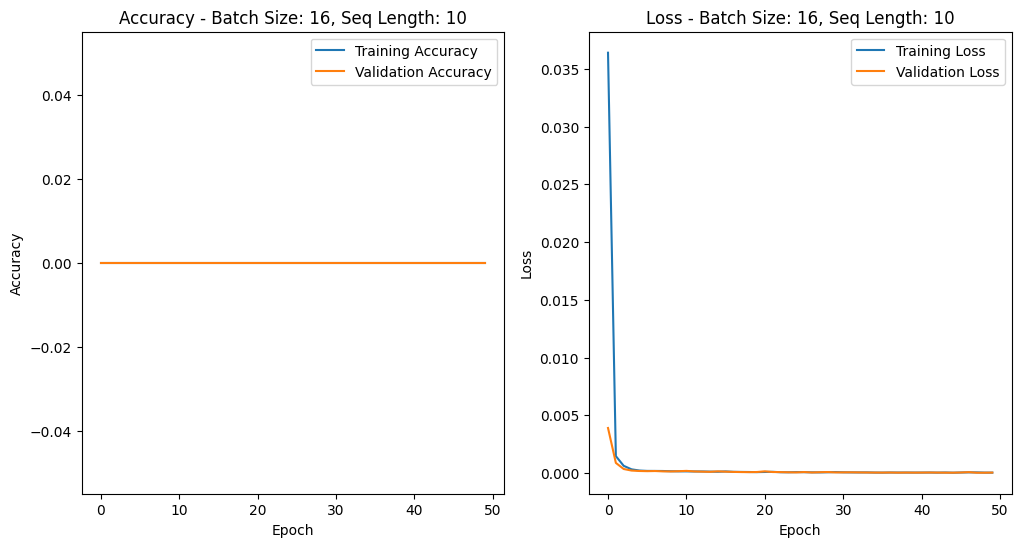

Training with batch size: 16, sequence length: 20


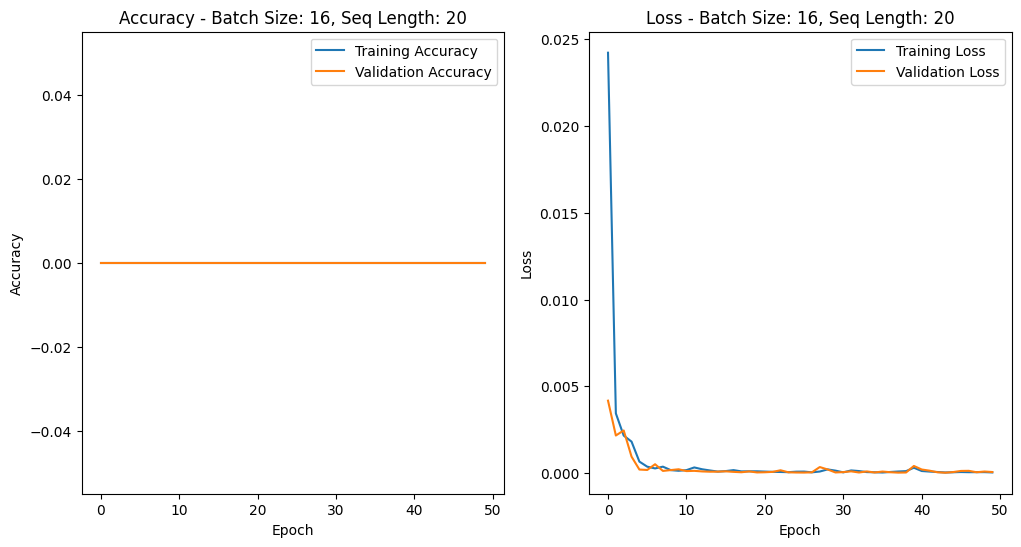

Training with batch size: 16, sequence length: 30


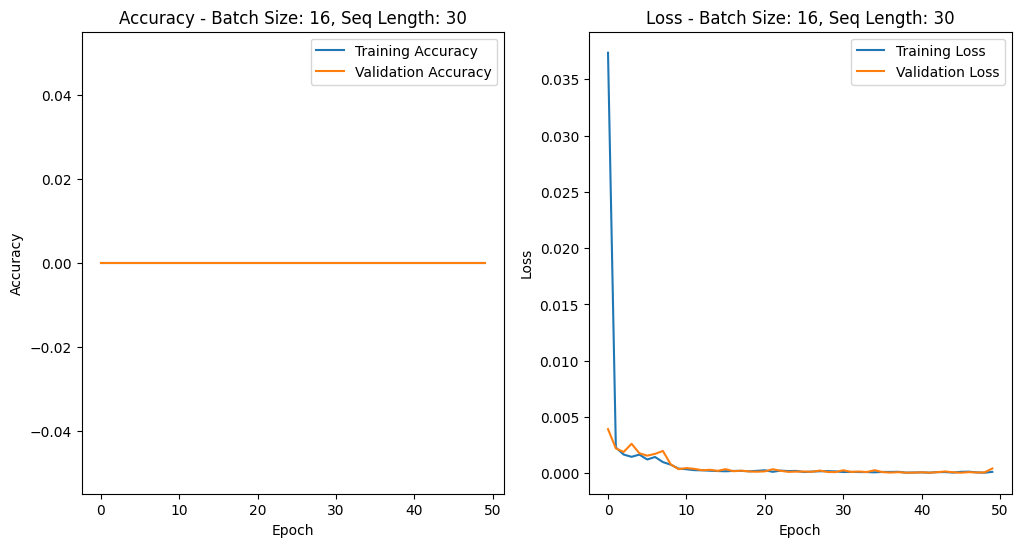

Training with batch size: 32, sequence length: 10


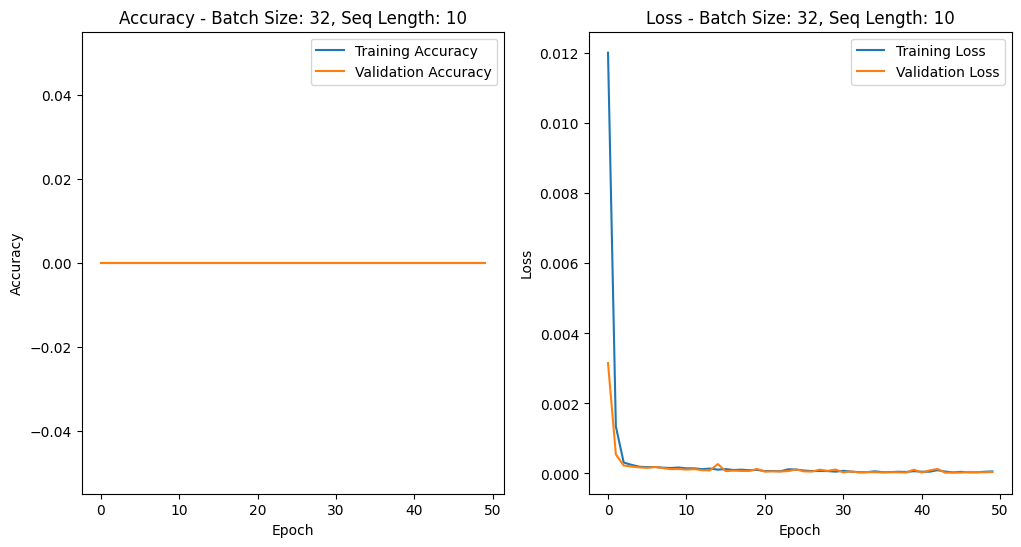

Training with batch size: 32, sequence length: 20


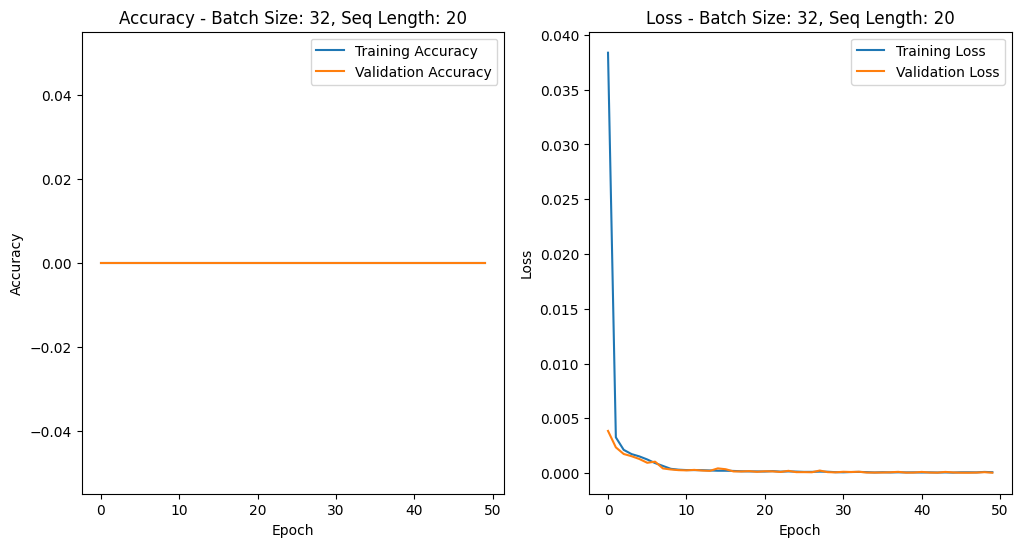

Training with batch size: 32, sequence length: 30


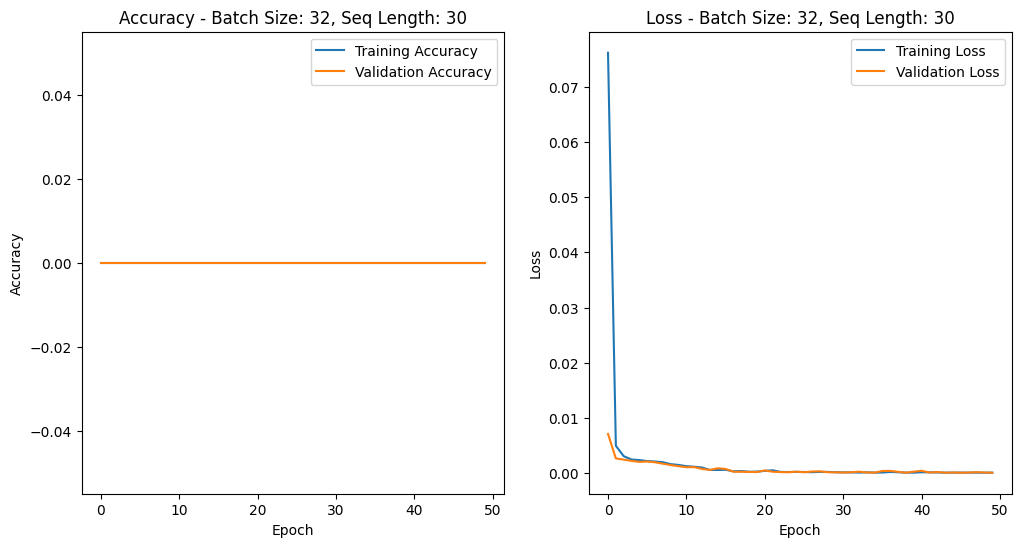

Training with batch size: 64, sequence length: 10


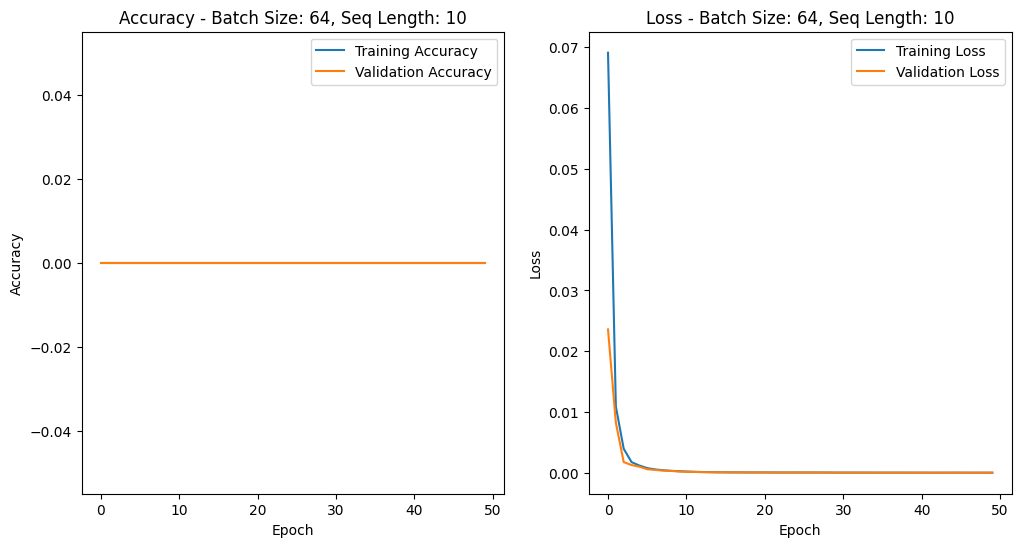

Training with batch size: 64, sequence length: 20


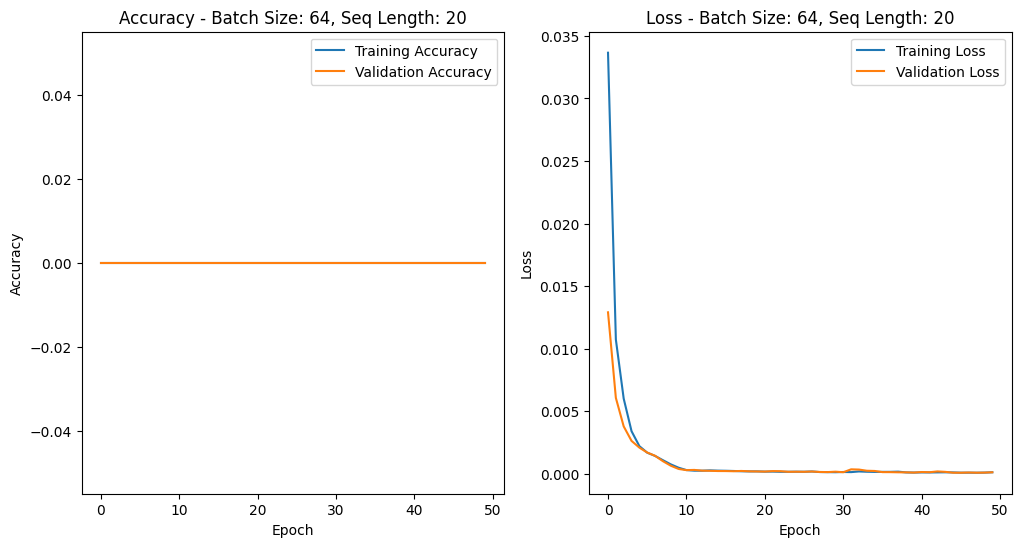

Training with batch size: 64, sequence length: 30


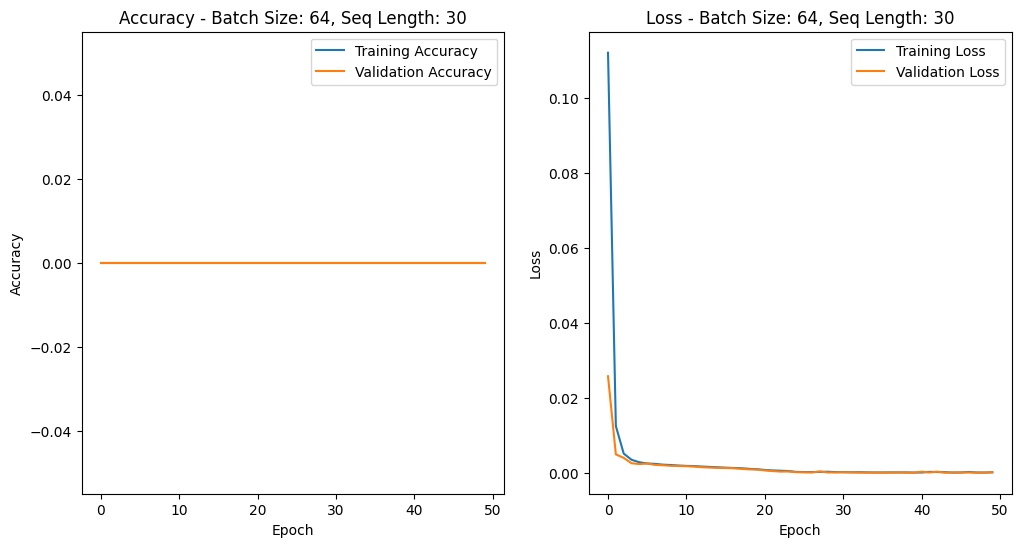

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Function to generate synthetic data
def generate_data(seq_length):
    # Generate random sequence data
    X = np.random.rand(1000, seq_length, 1)
    y = np.mean(X, axis=1)  # Output is the mean of the sequence

    return X, y

# Define RNN model
def create_rnn_model(seq_length):
    model = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, input_shape=(seq_length, 1)),
        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

    return model

# Function to train RNN model
def train_rnn_model(X_train, y_train, batch_size, seq_length, epochs=50):
    model = create_rnn_model(seq_length)
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=0)
    return history.history

# Main function to run experiments
def run_experiments(batch_sizes, seq_lengths):
    for batch_size in batch_sizes:
        for seq_length in seq_lengths:
            print(f"Training with batch size: {batch_size}, sequence length: {seq_length}")
            X_train, y_train = generate_data(seq_length)
            history = train_rnn_model(X_train, y_train, batch_size, seq_length)
            plot_training_history(history, batch_size, seq_length)

# Function to plot training history
def plot_training_history(history, batch_size, seq_length):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Training Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Accuracy - Batch Size: {batch_size}, Seq Length: {seq_length}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'Loss - Batch Size: {batch_size}, Seq Length: {seq_length}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Define parameters for experiments
batch_sizes = [16, 32, 64]
seq_lengths = [10, 20, 30]

# Run experiments
run_experiments(batch_sizes, seq_lengths)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import shap
import matplotlib.pyplot as plt

# Example sequences (replace with your actual sequences)
X_train_seq = [[1, 2, 3], [4, 5], [6, 7, 8, 9]]  # Replace with your actual training sequence data
X_test_seq = [[1, 2], [3, 4, 5, 6], [7, 8, 9]]  # Replace with your actual test sequence data

# Pad sequences to ensure uniform input size
max_length = 100  # Adjust as needed based on your dataset
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Define an RNN model (replace with your actual architecture)
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=1000, output_dim=64, input_length=max_length))  # Example Embedding layer
rnn_model.add(LSTM(128, return_sequences=False))
rnn_model.add(Dense(10, activation='softmax'))  # Assuming 10 classes, adjust as per your dataset

# Compile the model (you can skip this if your model is pre-trained and loaded)
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Initialize the JS visualization code for SHAP
shap.initjs()

# Use KernelExplainer to explain predictions
background = X_train_pad[:100]  # Using a subset of training data for background

# Define a prediction function
def predict_fn(data):
    return rnn_model.predict(data)

explainer = shap.KernelExplainer(predict_fn, background)
shap_values = explainer.shap_values(X_test_pad[:10], nsamples=100)  # Explain predictions for a subset of test data

# Remove the extra dimension from SHAP values
shap_values = np.squeeze(shap_values)

# Ensure feature names match the padded sequence length
feature_names = ['Feature ' + str(i) for i in range(max_length)]

# Verify dimensions
print("Shape of SHAP values: ", shap_values.shape)
print("Shape of X_test_pad: ", X_test_pad.shape)
print("Length of feature names: ", len(feature_names))



# Ensure the correct shapes for shap_values and X_test_pad
print("Shape of shap_values[0]:", shap_values[0].shape)
print("Shape of X_test_pad[0]:", X_test_pad[0].shape)

# Reshape the features to 2D as required by SHAP
X_test_pad_instance = X_test_pad[0].reshape(1, -1)

# Plot the SHAP values for the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test_pad_instance, feature_names=feature_names)



# Summary plot for a larger overview of the feature importances
print("Summary plot for a larger overview of the feature importances")
shap.summary_plot(shap_values, X_test_pad[:10], feature_names=feature_names)

# Dependence plot for a specific feature
chosen_feature_index = 37  # Index of the feature you are interested in
print("Dependence plot for a specific feature")
shap.dependence_plot(chosen_feature_index, shap_values, X_test_pad[:10], feature_names=feature_names)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step


  0%|          | 0/3 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Shape of SHAP values:  (3, 100, 10)
Shape of X_test_pad:  (3, 100)
Length of feature names:  100
Shape of shap_values[0]: (100, 10)
Shape of X_test_pad[0]: (100,)


IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
import sklearn

import shap

# a classic housing price dataset
X, y = shap.datasets.california(n_points=1000)

X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution

# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (1000, 8)
Shape of y: (1000,)


In [ ]:
print(f"Number of coefficients: {len(model.coef_)}")


Number of coefficients: 3


In [ ]:
####################################################################################################################################################################################################
# While coefficients are great for telling us what will happen when we change the value of an input feature, by themselves they are not a great way to measure the overall importance of a feature #
# This is because the value of each coefficient depends on the scale of the input features.                                                                                                        #
####################################################################################################################################################################################################

# Ensure 'X1', 'X2', 'X3' and 'y' are numerical
data['X1'] = pd.to_numeric(data['X1'], errors='coerce')
data['X2'] = pd.to_numeric(data['X2'], errors='coerce')
data['X3'] = pd.to_numeric(data['X3'], errors='coerce')
data['y'] = pd.to_numeric(data['y'], errors='coerce')

# Drop rows with missing values
data = data.dropna(subset=['X1', 'X2', 'X3', 'y'])

# Split the data into features and target
X = data[['X1', 'X2', 'X3']]
y = data['y']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print model coefficients
print("Model coefficients:\n")
for i, feature in enumerate(X.columns):
    print(f"{feature} = {model.coef_[i].round(5)}")

Model coefficients:

X1 = 2.99081
X2 = 1.91575
X3 = 1.06431


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
import shap
import tensorflow as tf
import numpy as np



# Initialize the JS visualization code for SHAP
shap.initjs()

# Define a prediction function that returns numpy arrays
def predict_fn(data):
    return model.predict(data).astype(np.float64)

# Ensure background and test data are numpy arrays with the correct shape
background = X_train_pad[:100].astype(np.float64)
X_test_pad_subset = X_test_pad[:10].astype(np.float64)

# Check the shapes before creating the explainer
print(f"Background shape: {background.shape}")
print(f"Test subset shape: {X_test_pad_subset.shape}")

# Adjust the input shape to match the model's expected input shape
if len(model.input_shape) == 3:
    background = np.reshape(background, (-1, max_length))
    X_test_pad_subset = np.reshape(X_test_pad_subset, (-1, max_length))

print(f"Adjusted background shape: {background.shape}")
print(f"Adjusted test subset shape: {X_test_pad_subset.shape}")

# Use DeepExplainer to explain predictions
explainer = shap.DeepExplainer(model, background)
shap_values = explainer.shap_values(X_test_pad_subset)

# Ensure feature names match the padded sequence length
feature_names = [tokenizer.index_word.get(i, 'UNK') for i in range(1, max_length + 1)]

# Verify dimensions
print("Shape of SHAP values: ", np.array(shap_values[0]).shape)
print("Shape of X_test_pad_subset: ", X_test_pad_subset.shape)
print("Length of feature names: ", len(feature_names))

# Plot the SHAP values for the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test_pad_subset[0], feature_names=feature_names)

# Summary plot for a larger overview of the feature importances
shap.summary_plot(shap_values[0], X_test_pad_subset, feature_names=feature_names)

# Dependence plot for a specific feature
chosen_feature_index = 0  # Index of the feature you are interested in
shap.dependence_plot(chosen_feature_index, shap_values[0], X_test_pad_subset, feature_names=feature_names)

# Waterfall plot for the first instance
sample_ind = 0  # Index of the sample you are interested in
shap.waterfall_plot(shap.Explanation(values=shap_values[0][sample_ind],
                                     base_values=explainer.expected_value[0],
                                     data=X_test_pad_subset[sample_ind],
                                     feature_names=feature_names))

# Beeswarm plot
shap.plots.beeswarm(shap_values[0])

ModuleNotFoundError: No module named 'shap'

In [ ]:
pip install numpy pandas scikit-learn shap matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 7.3 MB/s eta 0:00:00


Explain the model predictions using SHAP


Visualize the SHAP values


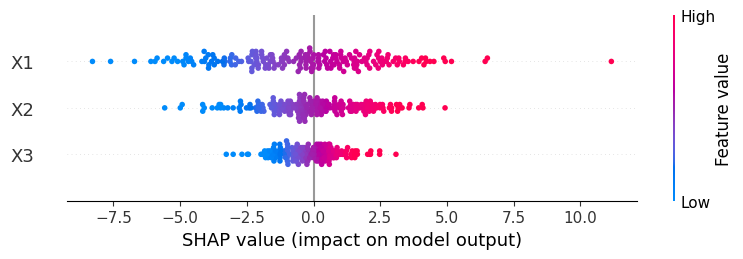

Summary plot


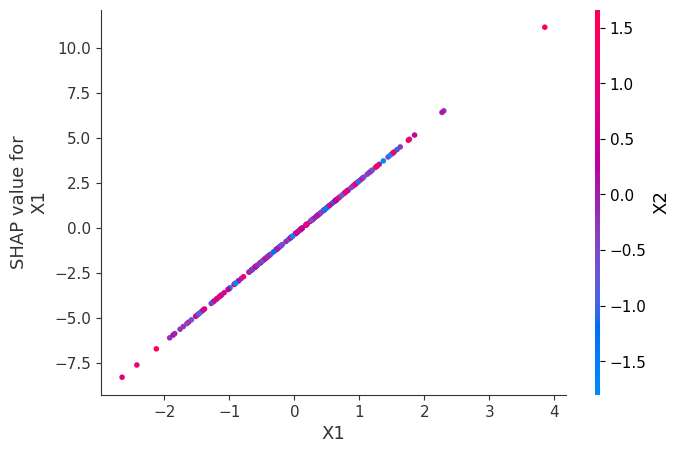

SHAP dependence plots


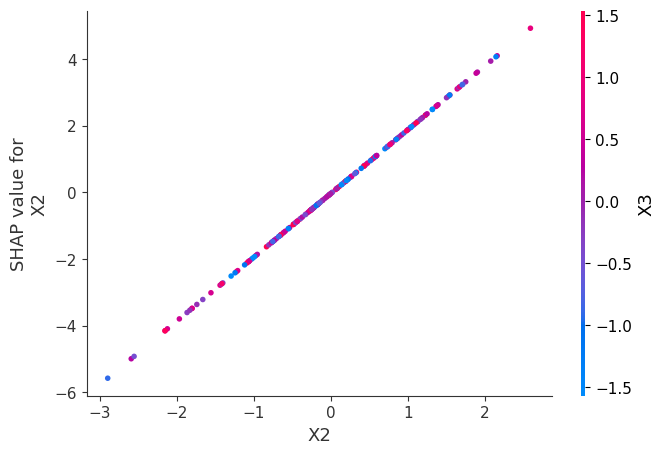

SHAP dependence plots


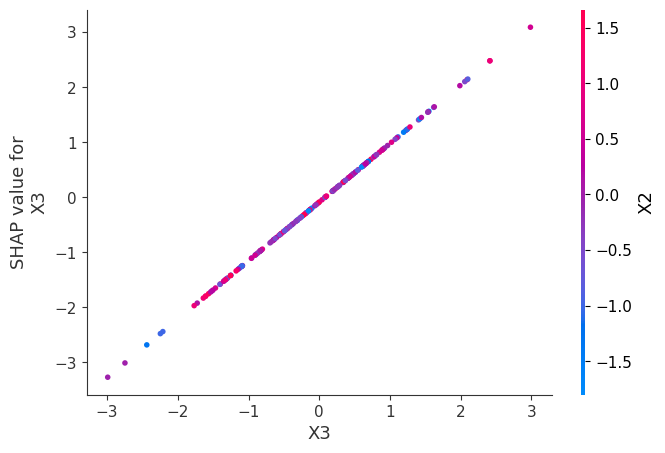

SHAP dependence plots
Extract SHAP values


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


ValueError: Sequential model 'sequential_24' has no defined inputs yet.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import shap
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

# Generate synthetic data
def generate_synthetic_data(n_samples=1000):
    np.random.seed(42)
    X1 = np.random.randn(n_samples)
    X2 = np.random.randn(n_samples)
    X3 = np.random.randn(n_samples)
    noise = np.random.randn(n_samples)

    # Create a linear combination of the features with some noise
    y = 3*X1 + 2*X2 + X3 + noise

    # Create a DataFrame
    data = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'y': y})

    return data

# Generate data
data = generate_synthetic_data()

# Split the data into training and test sets
X = data[['X1', 'X2', 'X3']]
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Explain the model predictions using SHAP
print("Explain the model predictions using SHAP")
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Visualize the SHAP values
shap.initjs()
print(f"Visualize the SHAP values")

# Summary plot
shap.summary_plot(shap_values, X_test)
print(f"Summary plot")

# SHAP dependence plots
for feature in X.columns:
    shap.dependence_plot(feature, shap_values.values, X_test)
    print(f"SHAP dependence plots")

# Extract SHAP values
shap_values_array = shap_values.values
print(f"Extract SHAP values")

# --- Additional Code for RNN Model ---

# Convert X to string format for text processing
X_str = X.astype(str)

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_str.values.flatten())
X_train_seq = tokenizer.texts_to_sequences(X_train.astype(str).values.flatten())
X_test_seq = tokenizer.texts_to_sequences(X_test.astype(str).values.flatten())

# Pad sequences to ensure uniform input size
max_length = 100  # Adjust as needed based on your dataset
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Build the RNN model
rnn_model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Using linear activation for regression
])

rnn_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
rnn_model.summary()

# Train the RNN model
# history = rnn_model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))

# Use DeepExplainer to explain predictions
background = X_train_pad[:100]  # Using a subset of training data for background
explainer = shap.DeepExplainer(rnn_model, background)
shap_values = explainer.shap_values(X_test_pad[:10])  # Explain predictions for a subset of test data

# Plot the SHAP values for the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test_pad[0])

# Summary plot for a larger overview of the feature importances
shap.summary_plot(shap_values[0], X_test_pad[:10], feature_names=[tokenizer.index_word.get(i, 'UNK') for i in range(1, 10001)])

# Dependence plot for a specific feature
chosen_feature_index = 0  # Index of the feature you are interested in
shap.dependence_plot(chosen_feature_index, shap_values[0], X_test_pad[:10], feature_names=[tokenizer.index_word.get(i, 'UNK') for i in range(1, 10001)])



In [ ]:
pip install pdpbox

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 79.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 15.6 MB/s eta 0:00:00
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 5.0.2
    Uninstalling Sphinx-5.0.2:
      Successfully uninstalled Sphinx-5.0.2


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pdpbox import pdp, info_plots
import matplotlib.pyplot as plt

# Generate synthetic data
def generate_synthetic_data(n_samples=1000):
    np.random.seed(42)
    X1 = np.random.randn(n_samples)
    X2 = np.random.randn(n_samples)
    X3 = np.random.randn(n_samples)
    noise = np.random.randn(n_samples)

    # Create a linear combination of the features with some noise
    y = 3*X1 + 2*X2 + X3 + noise

    # Create a DataFrame
    data = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'y': y})

    return data

# Generate data
data = generate_synthetic_data()

# Split the data into training and test sets
X = data[['X1', 'X2', 'X3']]
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Examine model coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)




  Feature  Coefficient
0      X1     2.990807
1      X2     1.915745
2      X3     1.064310


Length of feature_names: 100
Length of shap_values: 750
Length of exp: 750
Shape of sv: (750, 100, 10)


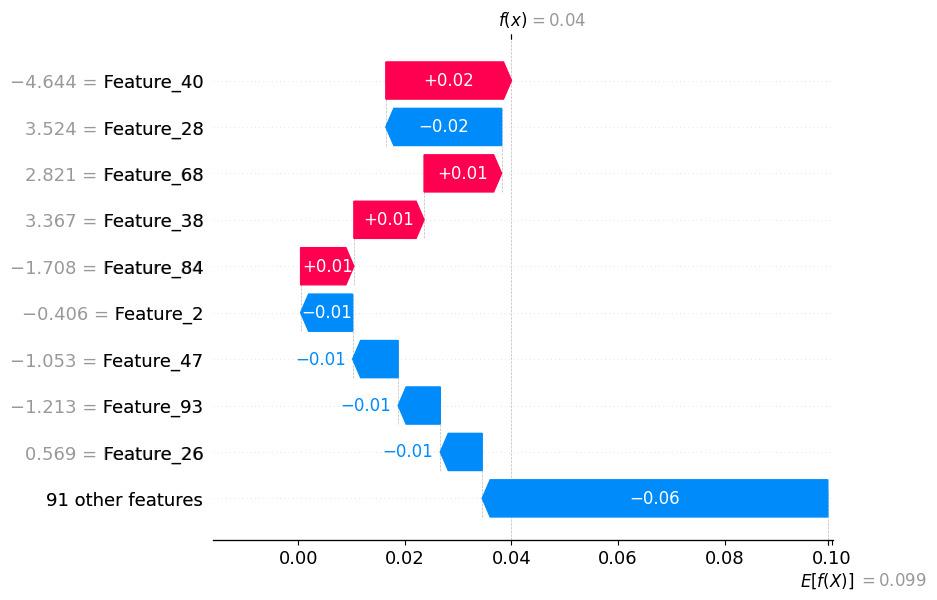

In [ ]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
#shap.plots.waterfall(shap_values[sample_ind], max_display=14)

from sklearn.datasets import make_classification
from shap import Explainer, Explanation, waterfall_plot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X, y = make_classification(1000, 100, n_informative=9, n_classes=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

explainer = Explainer(model)
sv = explainer(X_train)
feature_names = [f"Feature_{i}" for i in range(X_train.shape[1])]  # Adjust the format of feature names if needed

exp = Explanation(sv[:,:,6], sv.base_values[:,6], X_train, feature_names=feature_names)
idx = 7 # datapoint to explain
#print(data)

print("Length of feature_names:", len(feature_names))
print("Length of shap_values:", len(sv))
print("Length of exp:", len(exp))
print("Shape of sv:", sv.shape)

# Ensure idx is within bounds
if idx < len(exp):
    waterfall_plot(exp[idx])
else:
    print("Index out of range.")

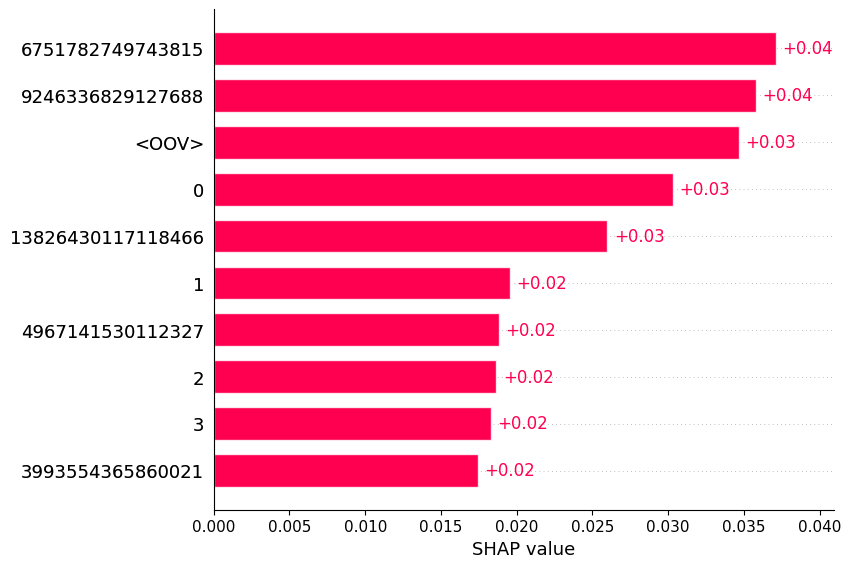

In [ ]:
# Calculate the maximum absolute SHAP values for each feature
max_abs_shap_values = np.max(np.abs(shap_values[0]), axis=0)

# Create a new SHAP Explanation object for the max absolute values
explanation_max_abs = shap.Explanation(
    values=max_abs_shap_values,
    base_values=None,  # Base values are not needed for a bar plot of max abs values
    data=None,  # Data is not needed for a bar plot of max abs values
    feature_names=feature_names
)

# Bar plot showing the maximum absolute SHAP values for each feature
shap.plots.bar(explanation_max_abs)


Adjusted background shape: (100, 10)
Adjusted test subset shape: (10, 10)
4/4 [==============================] - 0s 10ms/step


  0%|          | 0/10 [00:00<?, ?it/s]

7/7 [==============================] - 0s 9ms/step


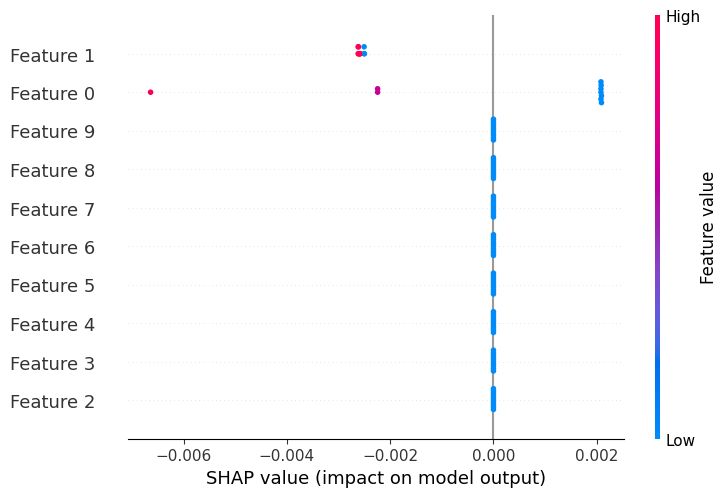

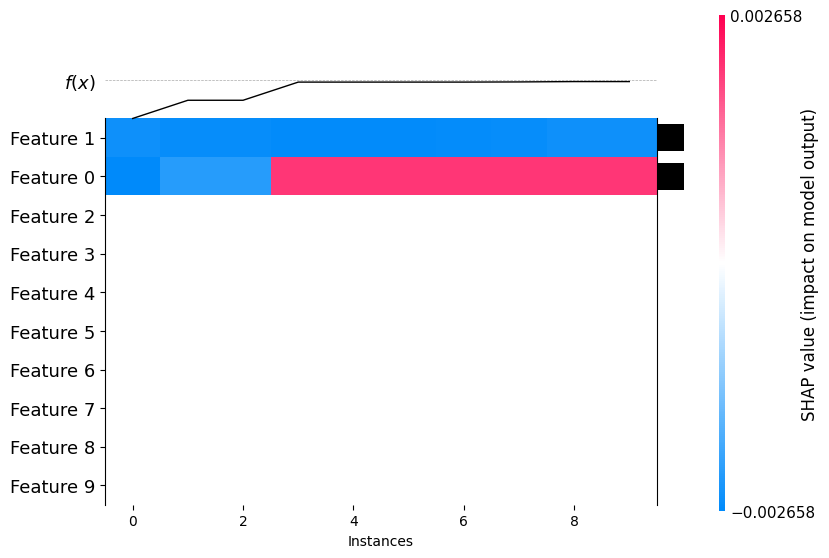

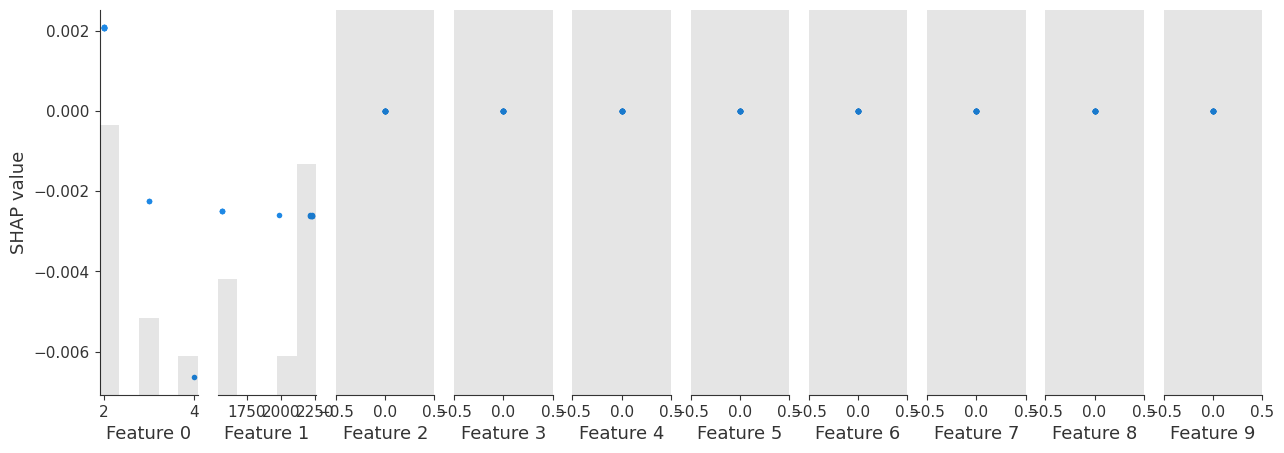

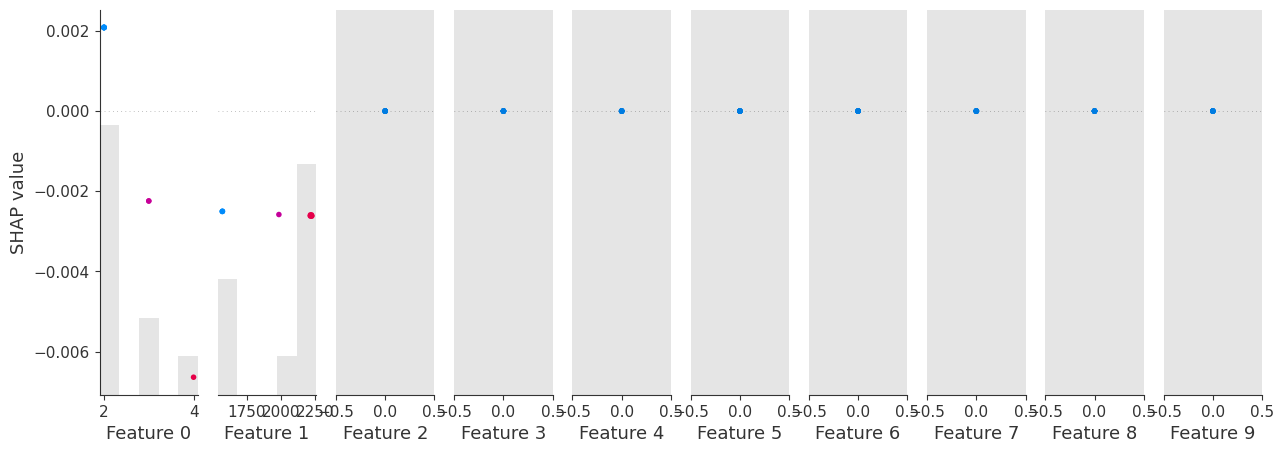

In [ ]:
import shap
import numpy as np

########
# By taking the absolute value and using a solid color we get a compromise between the complexity of the bar plot and the full beeswarm plot. Note that the bar plots below are just summary statistics from the values shown in the beeswarm plots below.
#########
# Initialize the JS visualization code for SHAP
shap.initjs()

# Define a prediction function that returns numpy arrays
def predict_fn(data):
    # Reshape the data back to 3D
    data = np.reshape(data, (data.shape[0], 10, 1))
    return model.predict(data).astype(np.float64)

# Ensure background and test data are numpy arrays with the correct shape
background = X_train_pad[:100, :10].astype(np.float64)  # Selecting the first 10 timesteps
X_test_pad_subset = X_test_pad[:10, :10].astype(np.float64)  # Selecting the first 10 timesteps

# Flatten the 3D input into 2D
background_2d = background.reshape(background.shape[0], -1)
X_test_pad_subset_2d = X_test_pad_subset.reshape(X_test_pad_subset.shape[0], -1)

print(f"Adjusted background shape: {background_2d.shape}")
print(f"Adjusted test subset shape: {X_test_pad_subset_2d.shape}")

# Use KernelExplainer to explain predictions
explainer = shap.KernelExplainer(predict_fn, background_2d)
shap_values = explainer.shap_values(X_test_pad_subset_2d, nsamples=100)

# Convert the shap_values list into a 2D numpy array
shap_values_2d = np.array(shap_values).reshape((X_test_pad_subset_2d.shape[0], X_test_pad_subset_2d.shape[1]))

# Create an Explanation object
explanation = shap.Explanation(shap_values_2d, base_values=explainer.expected_value, data=X_test_pad_subset_2d, feature_names=[f'Feature {i}' for i in range(X_test_pad_subset_2d.shape[1])])

# Beeswarm plot showing the SHAP values for the test subset
shap.plots.beeswarm(explanation)
shap.plots.heatmap(explanation)

shap.plots.scatter(explanation)

shap.plots.scatter(explanation, color=explanation)


In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import torch
import transformers
import shap

# Check if the dataset is loaded correctly and column names are as expected
print(data.columns)

# Extract the text data from column 'X1' (adjust if another column should be used)
text_data = data['X1'].astype(str).tolist()  # Ensure the data is in string format

# Load a BERT sentiment analysis model
tokenizer = transformers.DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
model = transformers.DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

# Define a prediction function
def f(x):
    tv = torch.tensor(
        [tokenizer.encode(v, padding="max_length", max_length=500, truncation=True) for v in x]
    )
    outputs = model(tv)[0].detach().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    val = sp.special.logit(scores[:, 1])  # Use one vs rest logit units
    return val

# Build an explainer using a token masker
explainer = shap.Explainer(f, tokenizer)

# Generate SHAP values for a subset of your dataset
shap_values = explainer(text_data[:10], fixed_context=1, batch_size=2)

# Visualize the explanations
shap.plots.text(shap_values)


Index(['X1', 'X2', 'X3', 'y'], dtype='object')


We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


  0%|          | 0/156 [00:00<?, ?it/s]

PartitionExplainer explainer:  10%|█         | 1/10 [00:00<?, ?it/s]

  0%|          | 0/182 [00:00<?, ?it/s]

PartitionExplainer explainer:  30%|███       | 3/10 [01:13<01:45, 15.03s/it]

  0%|          | 0/182 [00:00<?, ?it/s]

PartitionExplainer explainer:  40%|████      | 4/10 [01:44<02:10, 21.78s/it]

  0%|          | 0/156 [00:00<?, ?it/s]

PartitionExplainer explainer:  50%|█████     | 5/10 [02:15<02:04, 24.98s/it]

  0%|          | 0/182 [00:00<?, ?it/s]

PartitionExplainer explainer:  60%|██████    | 6/10 [02:47<01:49, 27.47s/it]

  0%|          | 0/210 [00:00<?, ?it/s]

PartitionExplainer explainer:  70%|███████   | 7/10 [03:20<01:28, 29.34s/it]

  0%|          | 0/156 [00:00<?, ?it/s]

PartitionExplainer explainer:  80%|████████  | 8/10 [03:49<00:58, 29.27s/it]

  0%|          | 0/182 [00:00<?, ?it/s]

PartitionExplainer explainer:  90%|█████████ | 9/10 [04:20<00:29, 29.71s/it]

  0%|          | 0/210 [00:00<?, ?it/s]

PartitionExplainer explainer: 100%|██████████| 10/10 [04:53<00:00, 30.72s/it]

  0%|          | 0/156 [00:00<?, ?it/s]

PartitionExplainer explainer: 11it [05:22, 32.26s/it]


In [ ]:
print(data[:10])  # Print the first 10 items of text_data to ensure it's correctly extracted


         X1        X2        X3         y
0  0.496714  1.399355 -0.675178  1.705867
1 -0.138264  0.924634 -0.144519  0.429571
2  0.647689  0.059630 -0.792420  0.856301
3  1.523030 -0.646937 -0.307962  4.854942
4 -0.234153  0.698223 -1.893615 -0.643075
5 -0.234137  0.393485  0.213294 -1.037628
6  1.579213  0.895193  0.001205  7.015267
7  0.767435  0.635172 -0.817089  1.208255
8 -0.469474  1.049553  0.659246  2.432619
9  0.542560 -0.535235  0.937570  1.023655


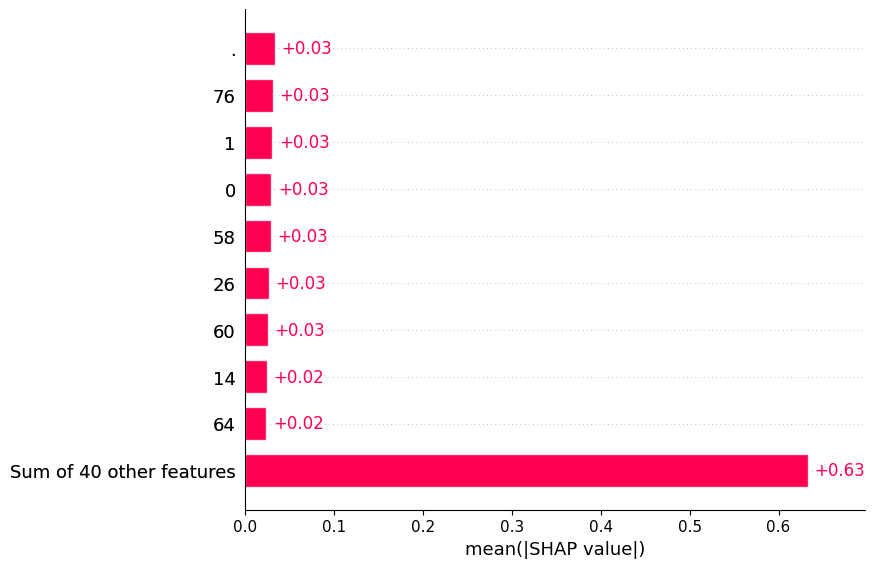

In [ ]:
shap.plots.bar(shap_values.abs.mean(0))

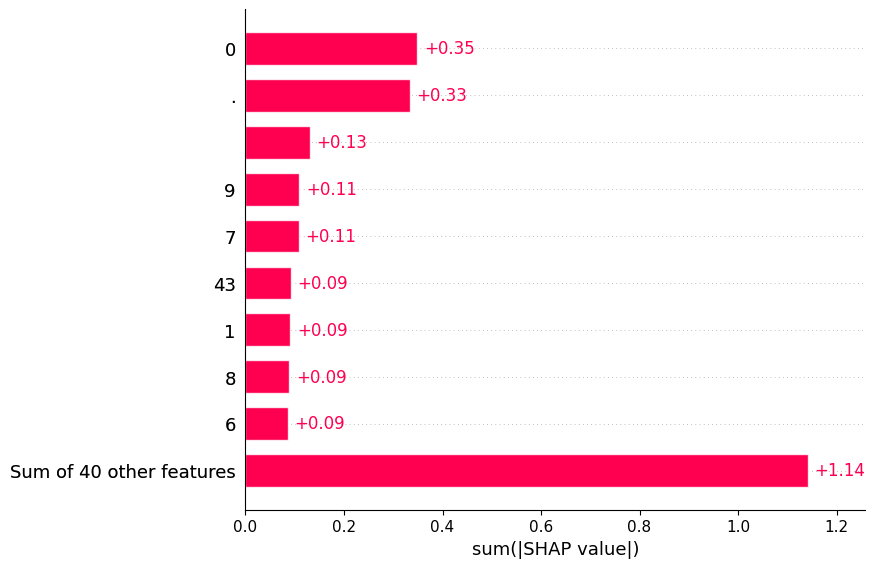

In [ ]:
shap.plots.bar(shap_values.abs.sum(0))


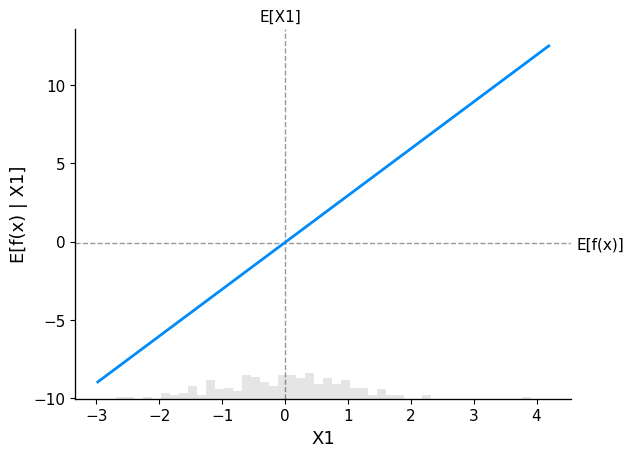

In [ ]:
import pandas as pd
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Ensure 'X1', 'X2', 'X3' and 'y' are numerical
data['X1'] = pd.to_numeric(data['X1'], errors='coerce')
data['X2'] = pd.to_numeric(data['X2'], errors='coerce')
data['X3'] = pd.to_numeric(data['X3'], errors='coerce')
data['y'] = pd.to_numeric(data['y'], errors='coerce')

# Drop rows with missing values
data = data.dropna(subset=['X1', 'X2', 'X3', 'y'])

# Split the data into features and target
X = data[['X1', 'X2', 'X3']]
y = data['y']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Use SHAP to explain the model's predictions
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Make a standard partial dependence plot for 'X1'
fig, ax = plt.subplots()
shap.partial_dependence_plot(
    "X1",  # Feature to plot
    model.predict,  # Model prediction function
    X_test,  # Data to use for the plot
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    ax=ax
)

# Display the plot
plt.show()

In [ ]:

# Use SHAP to explain the model's predictions
background = shap.maskers.Independent(X_train, max_samples=100)
explainer = shap.Explainer(model, background)
shap_values = explainer(X_test[:1000])

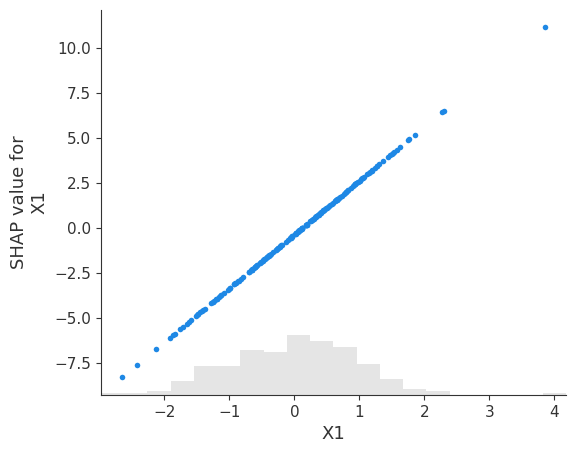

In [ ]:
# Create a SHAP scatter plot for the 'X1' feature
shap.plots.scatter(shap_values[:, "X1"])

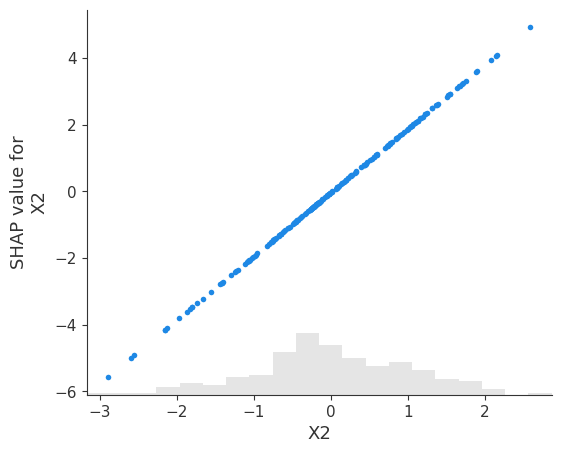

In [ ]:
shap.plots.scatter(shap_values[:, "X2"])

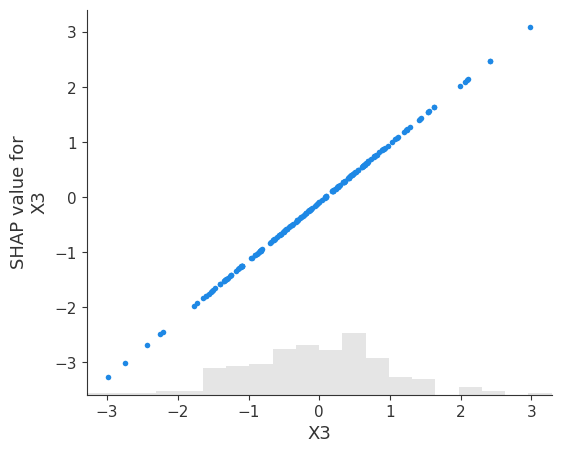

In [ ]:
shap.plots.scatter(shap_values[:, "X3"])

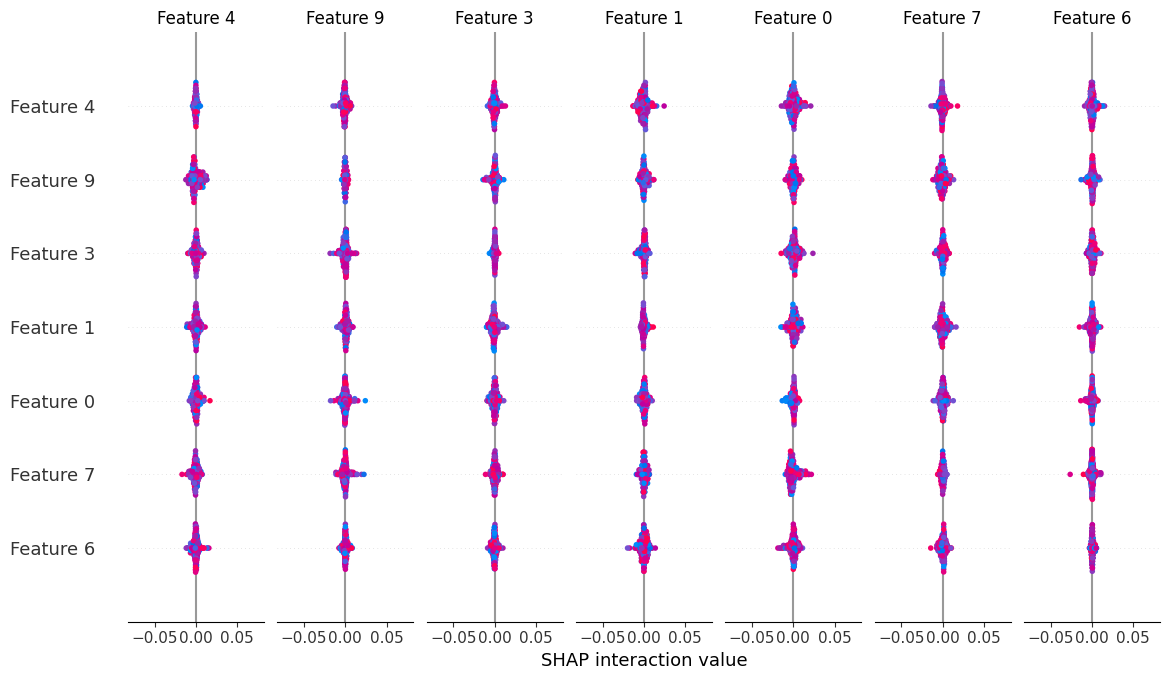

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Convert y_train to categorical labels
y_train_encoded = label_encoder.fit_transform(y_train)

# Now, train the model using the encoded target variable
model.fit(X_train, y_train_encoded)

# Compute SHAP values
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

# Visualize SHAP values (e.g., summary plot)
shap.summary_plot(shap_values, X_test)

# Interpret the SHAP values
# (e.g., identify important features, understand feature interactions)


In [ ]:
!pip install --upgrade tensorflow shap

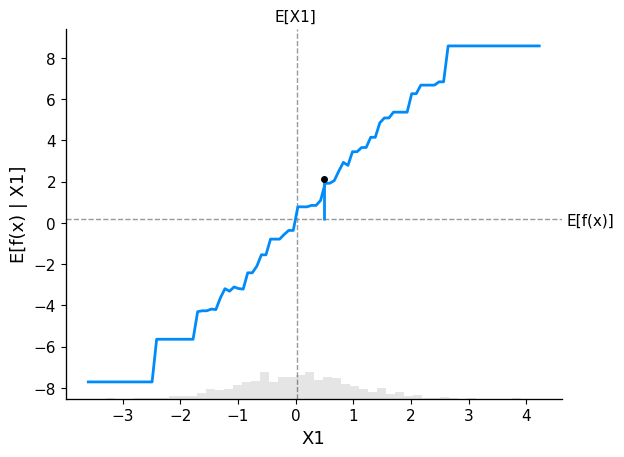

In [ ]:
import xgboost

# Train an XGBoost model
model_xgb = xgboost.XGBRegressor(n_estimators=100, max_depth=2).fit(X, y)

# Use SHAP to explain the model's predictions
explainer_xgb = shap.Explainer(model_xgb, X)
shap_values_xgb = explainer_xgb(X)


# Make a standard partial dependence plot with a single SHAP value overlaid
sample_ind = 0  # We can change this index to overlay different samples
fig, ax = shap.partial_dependence_plot(
    "X1",  # Feature to plot
    model_xgb.predict,  # Model prediction function
    X,  # Data to use for the plot
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    shap_values=shap_values_xgb[sample_ind : sample_ind + 1, :]
)

# Display the plot
plt.show()

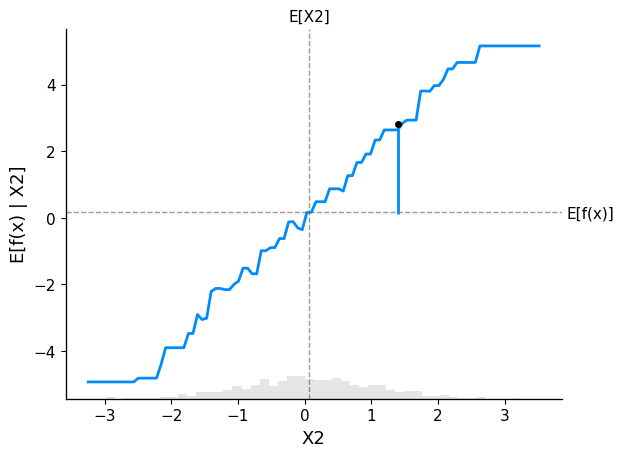

In [ ]:
# Make a standard partial dependence plot with a single SHAP value overlaid
sample_ind = 0  # We can change this index to overlay different samples
fig, ax = shap.partial_dependence_plot(
    "X2",  # Feature to plot
    model_xgb.predict,  # Model prediction function
    X,  # Data to use for the plot
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    shap_values=shap_values_xgb[sample_ind : sample_ind + 1, :]
)

# Display the plot
plt.show()

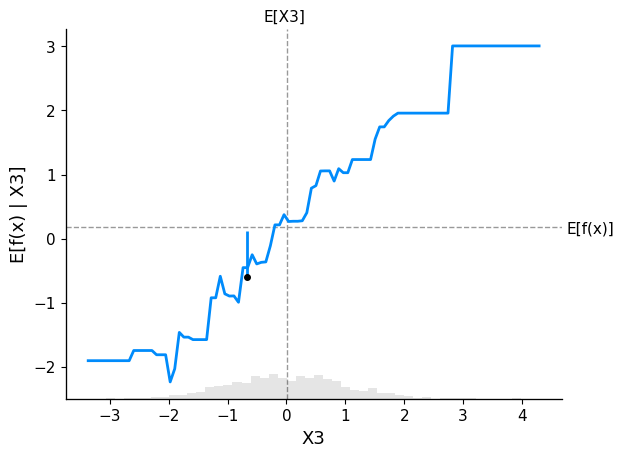

In [ ]:
# Make a standard partial dependence plot with a single SHAP value overlaid
sample_ind = 0  # We can change this index to overlay different samples
fig, ax = shap.partial_dependence_plot(
    "X3",  # Feature to plot
    model_xgb.predict,  # Model prediction function
    X,  # Data to use for the plot
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    shap_values=shap_values_xgb[sample_ind : sample_ind + 1, :]
)

# Display the plot
plt.show()

In [ ]:
# Let's assume the model was trained with sequences of length 3 (as per the error message)
# You need to adjust the padding accordingly to match the expected input length

max_length = 3  # Adjust this to match the input length your model was trained with

# Pad the sequences to match the expected input length (3 features)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Now, use KernelExplainer with the correctly sized input data
explainer = shap.KernelExplainer(model.predict, X_train_pad[:100])  # Subset of training data for background

# Get SHAP values for a subset of test data
shap_values = explainer.shap_values(X_test_pad[:10], nsamples=100)

# Plot the SHAP values for the first instance
#shap.force_plot(explainer.expected_value, shap_values[0], X_test_pad[0])

shap.force_plot(explainer.expected_value, shap_values[0], X_test_pad[0].tolist())



  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
import shap
import matplotlib.pyplot as plt

# Correct column names identified from the inspection
root_cause_col = 'RCA_Main_Root_Cause'  # Replace with the actual column name
defect_domain_col = 'RCA Defect Domain'  # Replace with the actual column name

# Remove any missing values
data.dropna(subset=[root_cause_col, defect_domain_col], inplace=True)
data.isna().sum()

# Encode labels
label_encoder = LabelEncoder()
data['labels'] = label_encoder.fit_transform(data[defect_domain_col])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[root_cause_col], data['labels'], test_size=0.2, random_state=42)

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


# Apply TruncatedSVD to reduce the dimensionality of TF-IDF vectors
n_components = 100  # Adjust the number of components as needed
svd = TruncatedSVD(n_components=n_components, random_state=42)
X_train_svd = svd.fit_transform(X_train_tfidf)
X_test_svd = svd.transform(X_test_tfidf)

# Train an SVM classifier on the reduced-dimensional data
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train_svd, y_train)

# Initialize the JS visualization code for SHAP
shap.initjs()

# Use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(svm.predict_proba, X_train_svd, link="logit")
shap_values = explainer.shap_values(X_test_svd, nsamples=100)

# Plot the SHAP values for the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0, :], X_test_svd[0, :], link="logit")
plt.show()

# Summary plot for a larger overview of the feature importances
shap.summary_plot(shap_values, X_test_svd)

KeyError: ['RCA_Main_Root_Cause', 'RCA Defect Domain']